<a href="https://colab.research.google.com/github/welashi/ANN/blob/main/nn4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Борьба с переобучением Dropout


11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238510 (931.68 KB)
Trainable params: 238510 (931.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
157/157 [==============================] - 7s 32ms/step - loss: 1.1

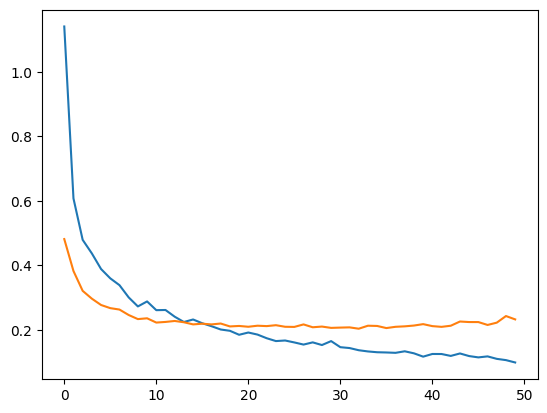

In [1]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

limit = 5000
x_train_data = x_train[:limit]
y_train_data = y_train_cat[:limit]

x_valid = x_train[limit : limit * 2]
y_valid = y_train_cat[limit : limit * 2]

model = keras.Sequential(
    [
        Flatten(input_shape=(28, 28, 1)),
        Dense(300, activation="relu"),
        Dropout(0.8),
        Dense(10, activation="softmax"),
    ]
)

# вывод структуры НС в консоль
print(model.summary())

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


his = model.fit(
    x_train_data,
    y_train_data,
    epochs=50,
    batch_size=32,
    validation_data=(x_valid, y_valid),
)


plt.plot(his.history["loss"])
plt.plot(his.history["val_loss"])
plt.show()
